<h1>Comparing tow ways of minimize SIR model</h1>

In [1]:
import multiprocessing as mp
import sys
#add the path were the models are
sys.path.append("../main/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
import time
from functools import reduce
from modelos import SIR_PSO, SIR_PSO_padro
plt.style.use('seaborn-deep')

In [2]:
data = pd.read_csv("../data/estados.csv")
#Select only Sao Paulo
sp = data[data["state"] == "SP"]
#Remove missing values to not crash the intervals
sp = sp.dropna()
#create a series with the cummulative number of cases
y = np.array(sp["TOTAL"])

#Give the number of days since the day of first case confirmed
x = range(0,len(sp["newCases"]))

In [3]:
#start model PSO
modelPSO = SIR_PSO(50000000)

In [4]:
modelPSO.fit(x = x, y = y)
yPred = modelPSO.predict(x)

pyswarms.single.global_best: 100%|██████████|500/500, best_cost=9.08e+3


In [5]:
#start PSO pad
modelPSOPad = SIR_PSO_padro(50000000)
modelPSOPad.fit(x = x, y = y)
modelPSOPad.predict(x)

pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.304


array([1.00000000e+00, 1.29029177e+00, 1.64890573e+00, 2.09205823e+00,
       2.64146515e+00, 3.34059520e+00, 4.20191143e+00, 5.25001446e+00,
       6.58007721e+00, 8.20158131e+00, 1.02078877e+01, 1.27368144e+01,
       1.57960203e+01, 1.96534552e+01, 2.44503268e+01, 3.02637325e+01,
       3.76508815e+01, 4.67224284e+01, 5.78384785e+01, 7.19275451e+01,
       8.90369664e+01, 1.10172877e+02, 1.36306501e+02, 1.68893457e+02,
       2.08941986e+02, 2.58607198e+02, 3.19904366e+02, 3.95668160e+02,
       4.89326224e+02, 6.05240162e+02, 7.48440187e+02, 9.24662433e+02,
       1.14201374e+03, 1.41112599e+03])

<h2>Comparing fitting vs Observed</h2>

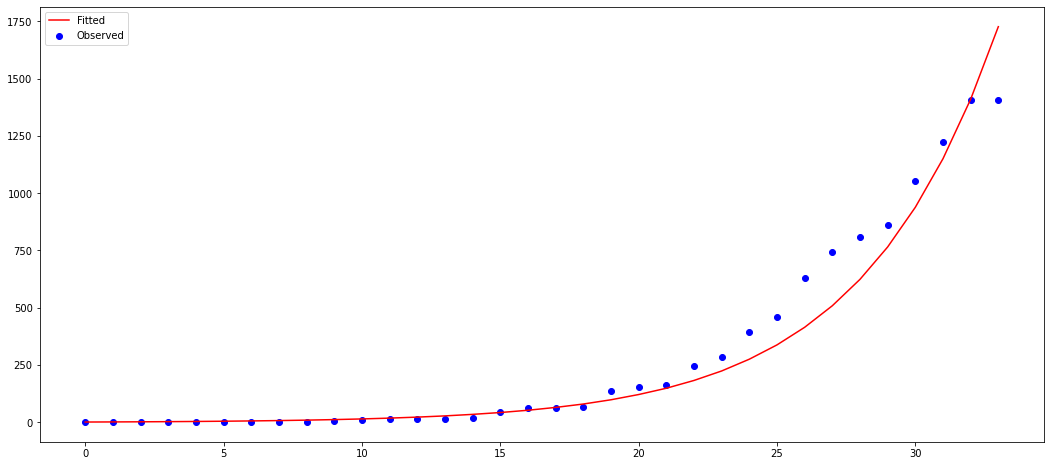

In [6]:
modelPSO.plotFit()

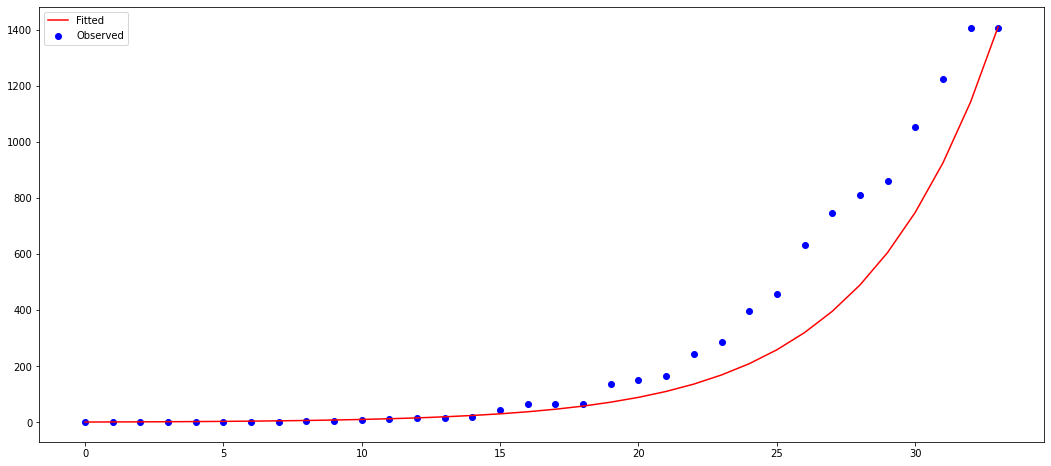

In [7]:
modelPSOPad.plotFit()